# This notebook contains regression using Neural Network

In [3]:
from data_loader import DataLoader
from neuralnetwork import create_nn_regressor
from configurations import args
from base_regressor_plot import BaseRegressorPlot
import matplotlib.pyplot as plt


## Notes
Read data from data_loader and the cleaning and encoding is that module
The neural_network has the module details

## Read Data
Read split ready to use data

In [4]:
data_loader = DataLoader(args)

Cached clean encoded data.
Resuming from saved model


2021-12-08 01:52:26.823360: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-08 01:52:26.899591: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)



val/train: 0.74

val/train: 0.74
get_predicted_vs_actual


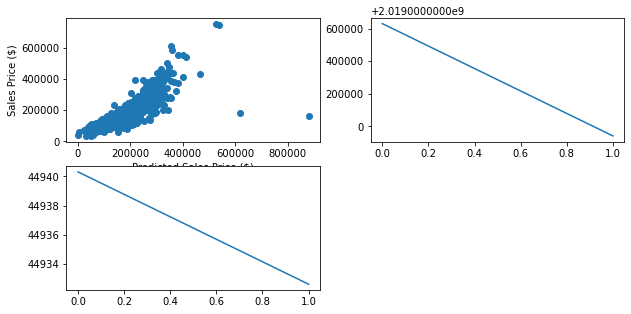

In [5]:
def analyze_neuralnet_regression():
    X_train, X_test, y_train, y_test = data_loader.get_clean_encoded_data()
    regressor = create_nn_regressor(X_train, X_test, y_test, epochs=2)
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(2, 2, figsize=(10, 5))
    BaseRegressorPlot.plot_predicted_vs_actual(axes[0][0], regressor)
    BaseRegressorPlot.plot_history_loss(axes[0][1], regressor)
    BaseRegressorPlot.plot_rmse(axes[1][0], regressor)
    BaseRegressorPlot.clean_out_plot(axes[1][1])

if not 'neuralnet' in args.list_of_sections_to_skip:
    analyze_neuralnet_regression()
